In [1]:
import os
import pydicom  
import numpy as np
import matplotlib.pyplot as plt
import dicom2nifti
from scipy import ndimage
import cv2


In [2]:
CT = pydicom.dcmread('C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/archive/moderate/moderate/0/391.dcm')
# Read all DICOM file
CT_image = CT.pixel_array 

CTA = pydicom.dcmread('C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/archive/moderate/moderate/1/391.dcm')
# Read all DICOM file
CTA_image = CTA.pixel_array 

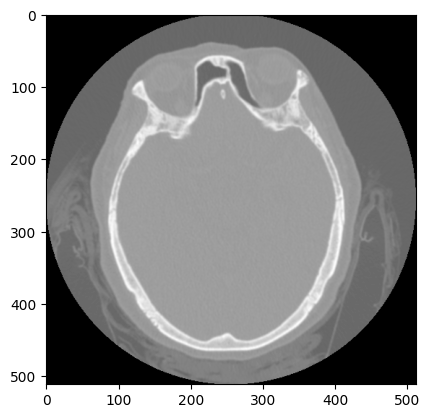

In [3]:
plt.imshow(CT_image, cmap = 'gray')

In [37]:
np.min(CTA_image)

-2000

In [38]:
CTwindow_center = CT.WindowCenter
CTwindow_width = CT.WindowWidth
CTintercept = CT.RescaleIntercept
CTslope = CT.RescaleSlope

In [39]:
print(CTwindow_center, CTwindow_width, CTintercept, CTslope)

35 250 -1024 1


In [40]:
CTAwindow_center = CTA.WindowCenter
CTAwindow_width = CTA.WindowWidth
CTAintercept = CTA.RescaleIntercept
CTAslope = CTA.RescaleSlope

In [41]:
print(CTAwindow_center, CTAwindow_width, CTAintercept, CTAslope)

40 400 -1024 1


In [42]:
def window_image(img, window_center,window_width, intercept, slope, rescale=True):
    img = (img*slope +intercept) #for translation adjustments given in the dicom file. 
    print(np.unique(img))
    img_min = window_center - window_width//2 #minimum HU level
    img_max = window_center + window_width//2 #maximum HU level
    img[img<img_min] = img_min #set img_min for all HU levels less than minimum HU level
    img[img>img_max] = img_max #set img_max for all HU levels higher than maximum HU level
    return img

In [43]:
CToutput = window_image(CT_image, CTwindow_center, CTwindow_width, CTintercept, CTslope, rescale = False)

[-3024. -1024. -1023. ...  1939.  1940.  1944.]


In [44]:
CTAoutput = window_image(CTA_image, CTAwindow_center, CTAwindow_width, CTAintercept, CTAslope, rescale = False)

[-3024. -1024. -1023. ...  1917.  1920.  1922.]


In [63]:
ssss = CTAoutput - CToutput

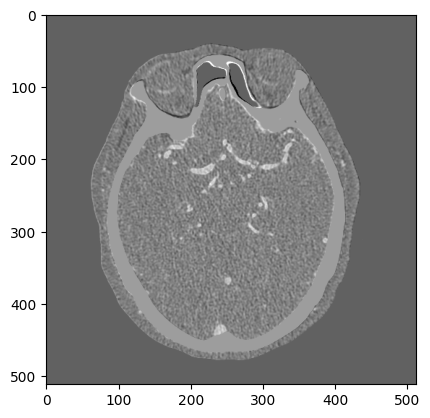

In [64]:
plt.imshow(ssss, cmap='gray')

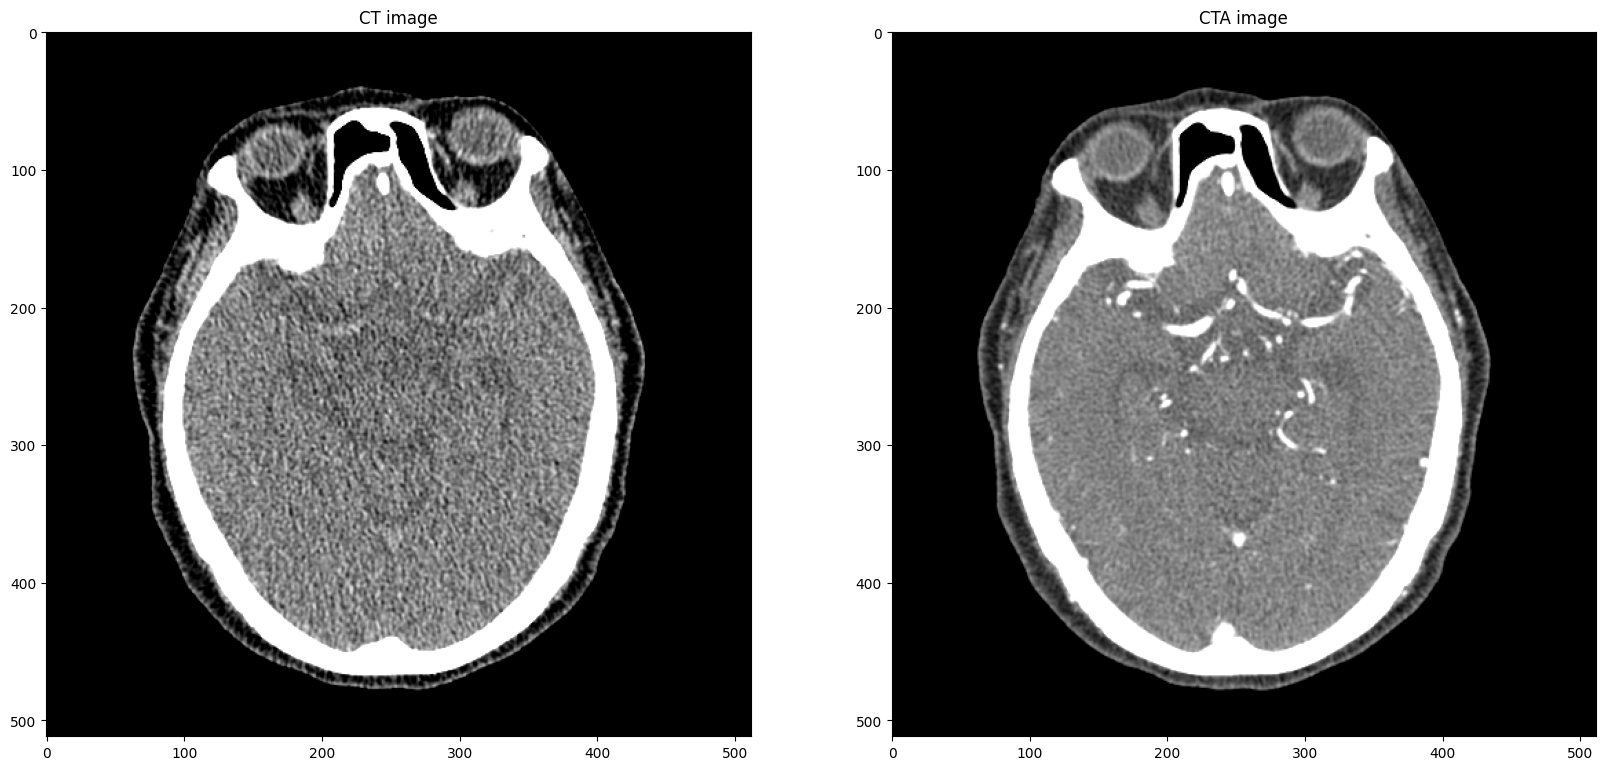

In [46]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(CToutput, cmap=plt.cm.gray)

ax1.set_title("CT image")

ax2.imshow(CTAoutput, cmap=plt.cm.gray)

ax2.set_title("CTA image")

plt.show()
fig.savefig("D:/31.png")

In [47]:
CTA_normalized = cv2.normalize(CTAoutput, None, 0, 255, cv2.NORM_MINMAX)
CTA_normalized = np.uint8(CTA_normalized)

In [48]:
CT_normalized = cv2.normalize(CToutput, None, 0, 255, cv2.NORM_MINMAX)
CT_normalized = np.uint8(CT_normalized)

In [49]:
# Apply thresholding to create a binary image
_, binary_CTA = cv2.threshold(CTA_normalized, 0, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_CTA, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour by area
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
else:
    largest_contour = np.array([])


# Create a mask with the same dimensions as the image
mask = np.zeros_like(binary_CTA)

# Draw the largest contour on the mask
if largest_contour.size > 0:
    cv2.drawContours(mask, [largest_contour], -1, (1), thickness=cv2.FILLED)


# Apply the mask to the original image
masked_CTA = cv2.bitwise_and(CTA_normalized, CTA_normalized, mask=mask)

In [50]:
# Apply thresholding to create a binary image
_, binary_CT = cv2.threshold(CT_normalized, 0, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_CT, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour by area
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
else:
    largest_contour = np.array([])


# Create a mask with the same dimensions as the image
mask = np.zeros_like(binary_CT)

# Draw the largest contour on the mask
if largest_contour.size > 0:
    cv2.drawContours(mask, [largest_contour], -1, (1), thickness=cv2.FILLED)


# Apply the mask to the original image
masked_CT = cv2.bitwise_and(CT_normalized, CT_normalized, mask=mask)

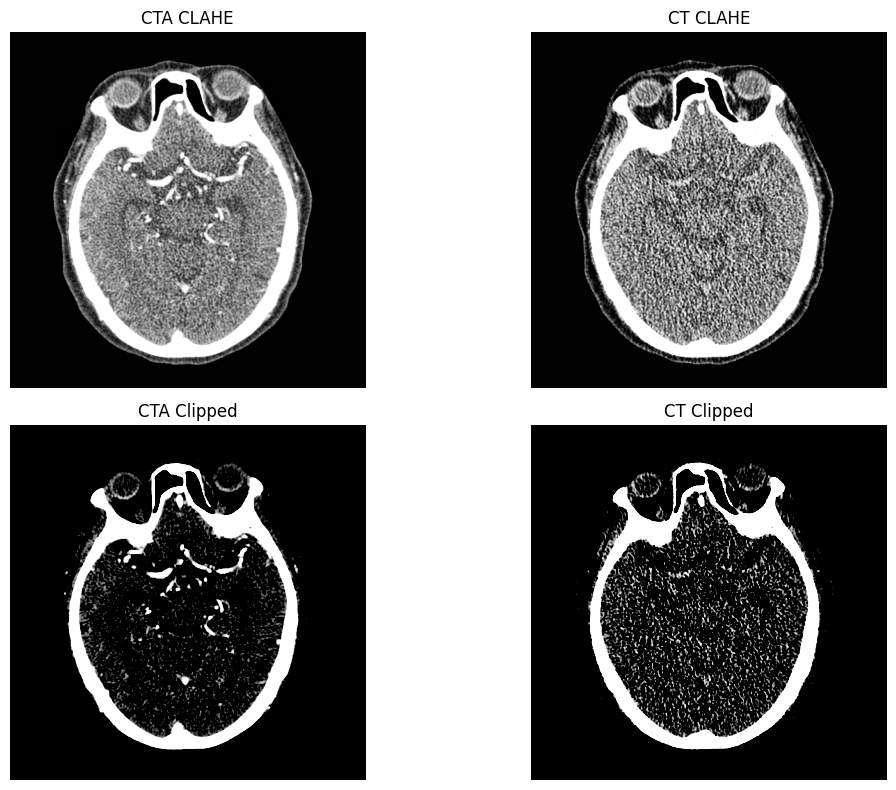

In [90]:
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('CTA CLAHE')
plt.imshow(clahe_CTA, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('CT CLAHE')
plt.imshow(clahe_CT, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('CTA Clipped')
plt.imshow(clahe_CTA,  cmap='gray', vmin=150, vmax=240)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('CT Clipped')
plt.imshow(clahe_CT,  cmap='gray', vmin=150, vmax=240)
plt.axis('off')

plt.tight_layout()
plt.show()
fig.savefig("D:/32.png")

In [81]:
min_intensity = 100
max_intensity = 230

In [84]:

# Clip the values to the specified range
clipped_image = np.clip(clahe_CTA, min_intensity, max_intensity)
# Normalize the clipped image
normalized_image = (clipped_image - min_intensity) / (max_intensity - min_intensity)


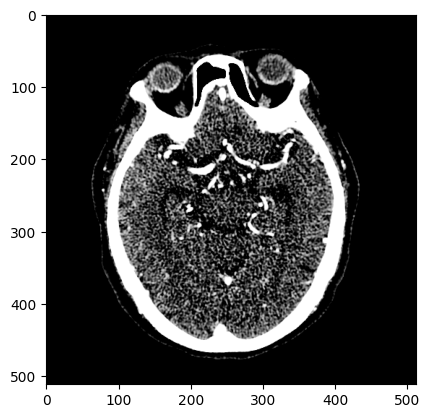

In [85]:
plt.imshow(normalized_image, cmap='gray')

In [53]:
img_example_hist = cv2.equalizeHist(masked_CTA)

In [59]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_CTA = clahe.apply(masked_CTA.astype(np.uint8))
clahe_CT = clahe.apply(masked_CT.astype(np.uint8))

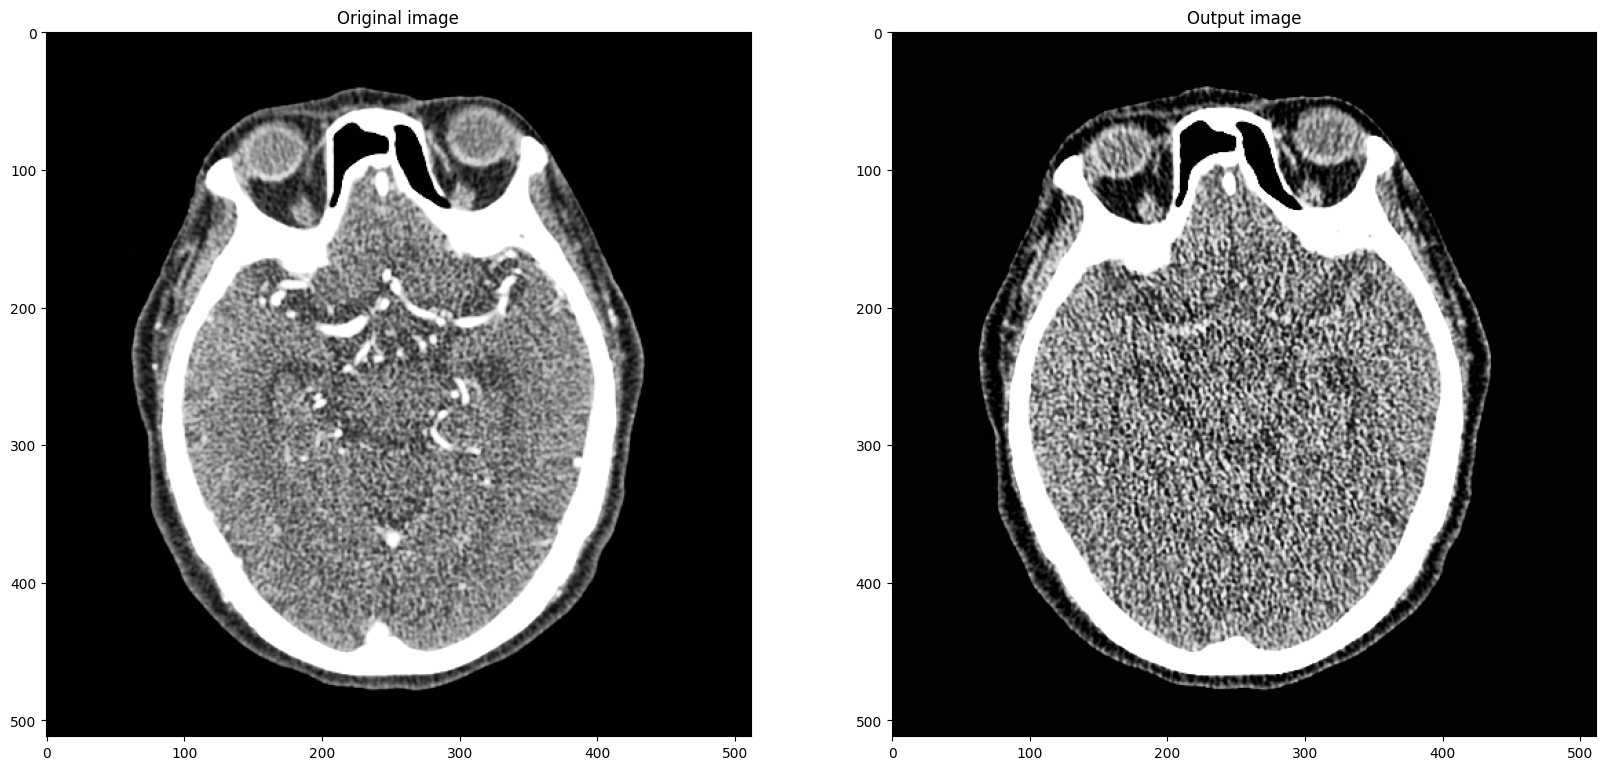

In [60]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(clahe_CTA,  cmap='gray')

ax1.set_title("Original image")

ax2.imshow(clahe_CT,  cmap='gray')

ax2.set_title("Output image")

plt.show()
fig.savefig("D:/31.png")

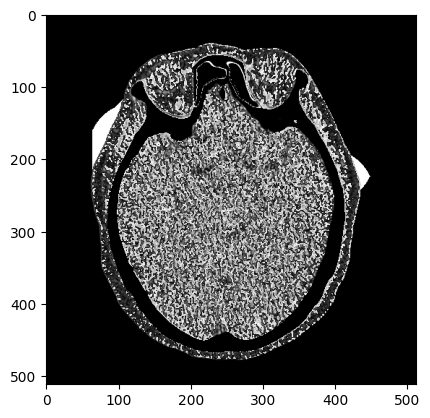

In [62]:
shh = clahe_CTA - clahe_CT
plt.imshow(shh, cmap='gray')